In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from imblearn.under_sampling import RandomUnderSampler

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
dataset = pd.read_excel('data_td.xlsx')


In [ ]:
dataset.head()

,DS_MARCA,NR_SERIE,DT_ENSAIO,DS_METODO,TP_ENSAIO,UF_ENSAIO,DS_RESULTADO,DESVIO_PONTO_ZERO,DESVIO_CONC_I,DESVIO_CONC_II,DESVIO_CONC_III,VL_ERRO_CONC_III_01,VL_ERRO_CONC_III_02,VL_ERRO_CONC_III_03,VL_ERRO_CONC_III_04,VL_ERRO_CONC_III_05,VL_ERRO_CONC_III_06,VL_ERRO_CONC_III_07,VL_ERRO_CONC_III_08,VL_ERRO_CONC_III_09,VL_ERRO_CONC_III_10,CLASSE
0,ALCOLIZER,22000002,2019-04-29,Liquido,Inicial,PE,Aprovado,0.0,0.002,0.001,0.792,-0.239,-0.239,1.671,1.671,1.432,1.432,1.432,1.432,1.909,1.909,0
1,ALCOLIZER,22000007,2019-04-29,Liquido,Inicial,PE,Aprovado,0.0,0.002,0.002,0.410,2.148,2.148,2.864,2.864,3.103,3.103,2.864,2.864,2.148,2.148,1
2,ALCOLIZER,22000008,2019-04-25,Liquido,Inicial,PE,Aprovado,0.0,0.002,0.001,0.397,4.296,3.819,4.057,2.864,3.819,3.819,4.057,3.580,4.296,3.819,1
3,ALCOLIZER,22000027,2019-04-24,Liquido,Inicial,PE,Aprovado,0.0,0.004,0.001,0.405,1.193,1.193,0.716,0.477,1.671,0.955,1.671,1.193,0.716,0.716,1
4,ALCOLIZER,22000034,2019-05-02,Liquido,Inicial,PE,Aprovado,0.0,0.002,0.003,0.529,1.909,3.341,2.148,2.387,2.864,2.864,2.387,2.148,3.341,1.909,1


In [ ]:
df_remove1 = dataset.loc[((dataset['DS_MARCA'] == 'ALCOLIZER'))]

In [ ]:
df_remove2 = dataset.loc[((dataset['DS_MARCA'] == 'DRAGER'))]
df_remove3 = dataset.loc[((dataset['DS_MARCA'] == 'INTOXIMETERS'))]

In [ ]:
dataset = dataset.drop(df_remove1.index)
dataset = dataset.drop(df_remove2.index)
dataset = dataset.drop(df_remove3.index)

In [ ]:
dataset.head()

,DS_MARCA,NR_SERIE,DT_ENSAIO,DS_METODO,TP_ENSAIO,UF_ENSAIO,DS_RESULTADO,DESVIO_PONTO_ZERO,DESVIO_CONC_I,DESVIO_CONC_II,DESVIO_CONC_III,VL_ERRO_CONC_III_01,VL_ERRO_CONC_III_02,VL_ERRO_CONC_III_03,VL_ERRO_CONC_III_04,VL_ERRO_CONC_III_05,VL_ERRO_CONC_III_06,VL_ERRO_CONC_III_07,VL_ERRO_CONC_III_08,VL_ERRO_CONC_III_09,VL_ERRO_CONC_III_10,CLASSE
145,ELEC,00019,2018-05-28,Gasoso,Subsequente,SP,Aprovado,0.0,0.001,0.001,0.703,-3.498,-2.675,-2.263,-2.675,-2.675,-1.646,-2.675,-1.852,-1.029,-2.263,1
146,ELEC,00053,2015-12-04,Gasoso,Subsequente,SP,Aprovado,0.0,0.002,0.003,0.923,3.132,2.505,3.340,3.340,3.967,4.384,2.505,2.505,4.175,1.253,1
147,ELEC,00061,2018-07-27,Gasoso,Subsequente,RS,Aprovado,0.0,0.002,0.004,1.137,0.000,0.381,0.762,1.333,2.095,3.048,2.286,2.286,2.667,3.429,0
148,ELEC,00079,2015-06-24,Gasoso,Subsequente,SP,Aprovado,0.0,0.002,0.001,0.597,-5.835,-5.433,-4.024,-5.231,-4.427,-5.433,-4.829,-4.628,-4.628,-5.433,1
149,ELEC,00086,2017-05-23,Gasoso,Subsequente,SP,Aprovado,0.0,0.003,0.002,1.394,-3.542,-3.333,-2.083,-1.042,-1.458,-0.833,0.208,0.208,-0.417,0.000,1


In [ ]:
x = dataset.drop(columns=['NR_SERIE', 'DT_ENSAIO', 'DS_RESULTADO','CLASSE'])
y = dataset.iloc[:,-1].values

In [ ]:
y.shape

(970,)

In [ ]:
x.head()

,DS_MARCA,DS_METODO,TP_ENSAIO,UF_ENSAIO,DESVIO_PONTO_ZERO,DESVIO_CONC_I,DESVIO_CONC_II,DESVIO_CONC_III,VL_ERRO_CONC_III_01,VL_ERRO_CONC_III_02,VL_ERRO_CONC_III_03,VL_ERRO_CONC_III_04,VL_ERRO_CONC_III_05,VL_ERRO_CONC_III_06,VL_ERRO_CONC_III_07,VL_ERRO_CONC_III_08,VL_ERRO_CONC_III_09,VL_ERRO_CONC_III_10
145,ELEC,Gasoso,Subsequente,SP,0.0,0.001,0.001,0.703,-3.498,-2.675,-2.263,-2.675,-2.675,-1.646,-2.675,-1.852,-1.029,-2.263
146,ELEC,Gasoso,Subsequente,SP,0.0,0.002,0.003,0.923,3.132,2.505,3.340,3.340,3.967,4.384,2.505,2.505,4.175,1.253
147,ELEC,Gasoso,Subsequente,RS,0.0,0.002,0.004,1.137,0.000,0.381,0.762,1.333,2.095,3.048,2.286,2.286,2.667,3.429
148,ELEC,Gasoso,Subsequente,SP,0.0,0.002,0.001,0.597,-5.835,-5.433,-4.024,-5.231,-4.427,-5.433,-4.829,-4.628,-4.628,-5.433
149,ELEC,Gasoso,Subsequente,SP,0.0,0.003,0.002,1.394,-3.542,-3.333,-2.083,-1.042,-1.458,-0.833,0.208,0.208,-0.417,0.000


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0,1,2,3])],remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [ ]:
print(x_train)

[[ 1.     0.     1.    ... -2.153  0.239  0.478]
 [ 1.     1.     0.    ...  0.     0.411 -0.411]
 [ 1.     1.     0.    ... -1.044 -0.209 -0.835]
 ...
 [ 1.     1.     0.    ... -4.321 -1.852 -3.704]
 [ 1.     1.     0.    ...  5.031  3.983  3.983]
 [ 1.     1.     0.    ...  2.083  1.875  1.458]]


In [ ]:
x_train.shape

(776, 29)

In [ ]:
y_test.shape

(194,)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
print(x_train)

[[ 0.         -4.03043973  4.03043973 ... -0.74217815  0.28688683
   0.40937444]
 [ 0.          0.24811189 -0.24811189 ...  0.21041184  0.36269735
   0.01723971]
 [ 0.          0.24811189 -0.24811189 ... -0.2515036   0.08942689
  -0.16978518]
 ...
 [ 0.          0.24811189 -0.24811189 ... -1.70140486 -0.63473981
  -1.43529084]
 [ 0.          0.24811189 -0.24811189 ...  2.43636644  1.93708776
   1.95541742]
 [ 0.          0.24811189 -0.24811189 ...  1.13203049  1.00796822
   0.84164894]]


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
x_res, y_res = rus.fit_sample(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
y_res.shape

(78,)

1    39
0    39
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


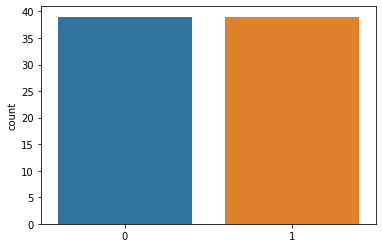

In [ ]:
print(pd.Series(y_res).value_counts())
sns.countplot(y_res);

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
model_res = LogisticRegression()
model_res.fit(x_res, y_res)
 
# fazer as previsões em cima dos dados de teste
y_pred_res = model_res.predict(x_test)
y_proba_res = model_res.predict_proba(x_test)
 
 
# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_res, digits=4))
 
# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_res)))
 
print(accuracy_score(y_test, y_pred_res))


Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.0727    0.5000    0.1270         8
           1     0.9712    0.7258    0.8308       186

    accuracy                         0.7165       194
   macro avg     0.5220    0.6129    0.4789       194
weighted avg     0.9342    0.7165    0.8017       194

Acurácia: 0.7165

0.7164948453608248


In [ ]:
cm = confusion_matrix(y_test, y_pred_res)
print(cm)

[[  4   4]
 [ 51 135]]
